 🔎درحال آموزش و گرفتن نتایج...

🧠 مدل: Linear Regression
⏱️ زمان آموزش: 0.0065 ثانیه
⏱️ زمان پیش‌بینی: 0.0012 ثانیه
🎯 خطای MSE: 300.90
📈 دقت (R²): 0.9856

🧠 مدل: Lasson
⏱️ زمان آموزش: 0.0081 ثانیه
⏱️ زمان پیش‌بینی: 0.0005 ثانیه
🎯 خطای MSE: 300.90
📈 دقت (R²): 0.9856

🧠 مدل: Ridge
⏱️ زمان آموزش: 0.0054 ثانیه
⏱️ زمان پیش‌بینی: 0.0002 ثانیه
🎯 خطای MSE: 300.90
📈 دقت (R²): 0.9856


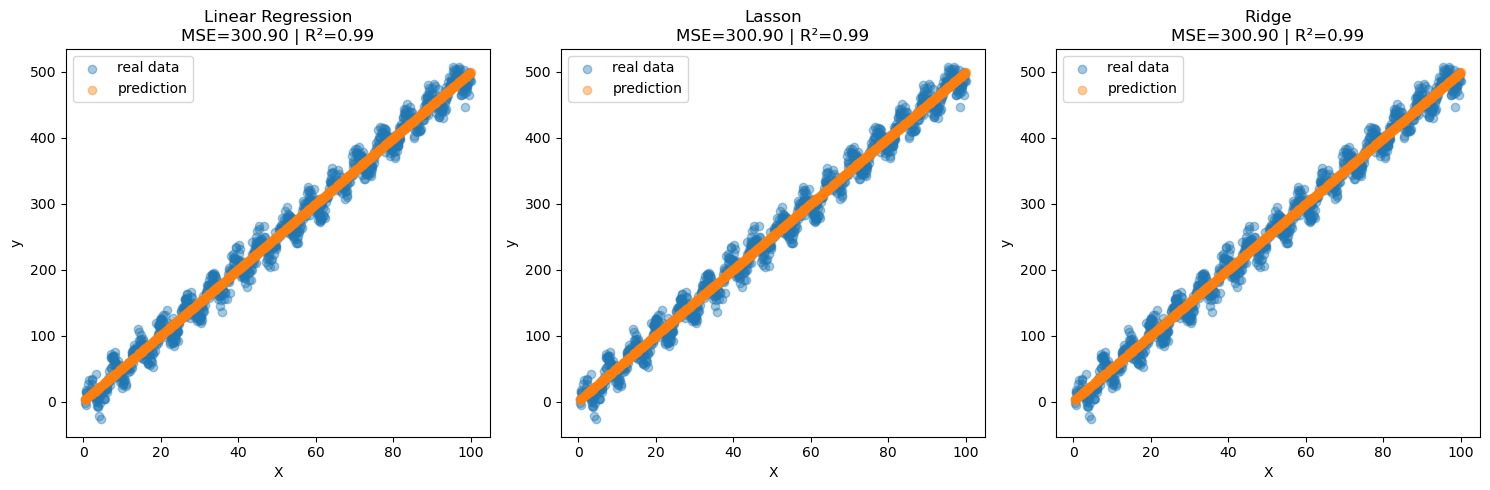

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
import time

# ساخت داده ها 
np.random.seed(42)
X=np.linspace(0,100,100000).reshape(-1,1)
noise=np.random.normal(0,10,size=(100000,))
y=5*X.squeeze()+20 * np.sin(X.squeeze()) +noise
# تقسیم داده ها 
x_train , x_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# تعریف مدل 
models={
    "Linear Regression":LinearRegression(),
    "Lasson":Lasso(alpha=0.01,max_iter=10000),
    "Ridge":Ridge(alpha=1.0)
}
# آموزش و ارزیابی مدل
results={}
print(" 🔎درحال آموزش و گرفتن نتایج...")
for name,model in models.items():
    print(f"\n🧠 مدل: {name}")
    # زمان آموزش 
    start_train=time.time()
    model.fit(x_train,y_train)
    end_train=time.time()
    # زمان پیش بینی 
    start_test=time.time()
    y_pred=model.predict(x_test)
    end_test=time.time()
    # محاسبات 
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    # ذخیره
    results[name]={
        "model":model,
        "y_pred":y_pred,
        "mse":mse,
        "r2":r2,
        "train_time":end_train-start_train,
        "test_time":end_test-start_test 
    }
    # چاپ مقادیر 
    print(f"⏱️ زمان آموزش: {results[name]['train_time']:.4f} ثانیه")
    print(f"⏱️ زمان پیش‌بینی: {results[name]['test_time']:.4f} ثانیه")
    print(f"🎯 خطای MSE: {mse:.2f}")
    print(f"📈 دقت (R²): {r2:.4f}")
# رسم نمودار 
sample_idx=np.random.choice(len(x_test),1000,replace=False)
x_sample=x_test[sample_idx]
y_sample=y_test[sample_idx]
plt.figure(figsize=(15,5))
for i,(name,result) in enumerate(results.items()):
    plt.subplot(1,3,i+1)
    plt.scatter(x_sample,y_sample,label="real data",alpha=0.4)
    plt.scatter(x_sample,result["y_pred"][sample_idx],label="prediction",alpha=0.4)
    plt.title(f"{name}\nMSE={result['mse']:.2f} | R²={result['r2']:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
plt.tight_layout()
plt.show()
    